In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


In [ ]:
import pandas as pd
data = pd.read_csv("student-mat.csv", sep=";")
print("Shape:", data.shape)
data.head()

Shape: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


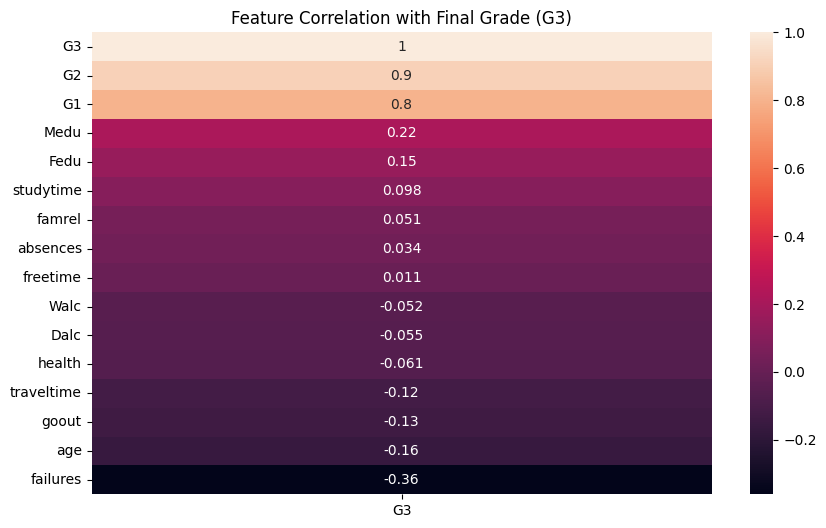

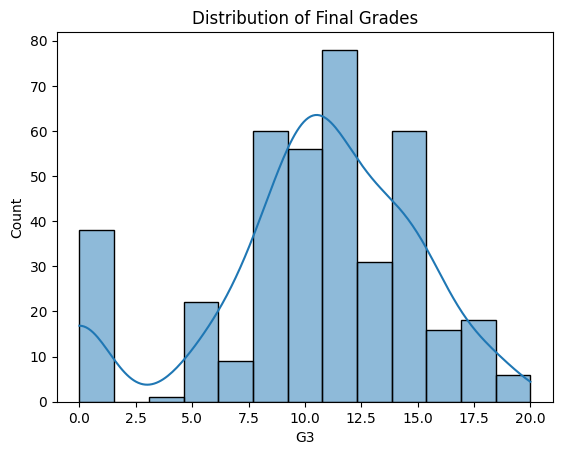

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr[['G3']].sort_values(by='G3', ascending=False), annot=True)
plt.title("Feature Correlation with Final Grade (G3)")
plt.show()
sns.histplot(data['G3'], kde=True)
plt.title("Distribution of Final Grades")
plt.show()

In [ ]:
print(data.isnull().sum())
data.dtypes

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


In [ ]:
X = data_encoded.drop('G3', axis=1)
y = data_encoded['G3']
print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (395, 41)
Target shape: (395,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

Training shape: (316, 41)
Test shape: (79, 41)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)
print(f"Linear Regression - MAE: {lr_mae:.2f}, R²: {lr_r2:.2f}")

Linear Regression - MAE: 1.65, R²: 0.72


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)
print(f"Random Forest - MAE: {rf_mae:.2f}, R²: {rf_r2:.2f}")

Random Forest - MAE: 1.16, R²: 0.81


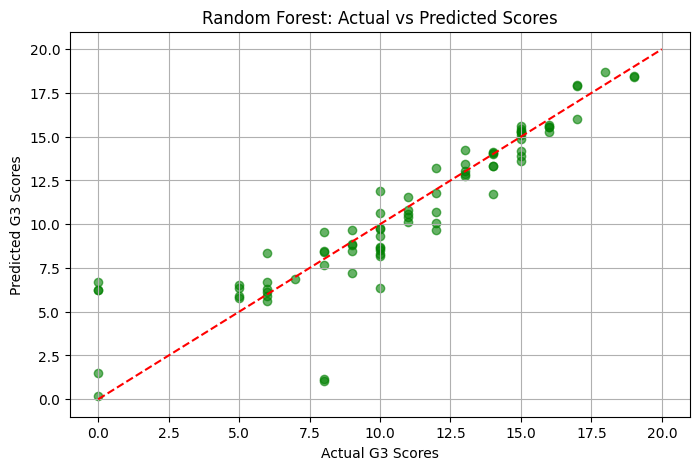

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rf_preds, color='green', alpha=0.6)
plt.plot([0, 20], [0, 20], '--r')
plt.xlabel("Actual G3 Scores")
plt.ylabel("Predicted G3 Scores")
plt.title("Random Forest: Actual vs Predicted Scores")
plt.grid(True)
plt.show()

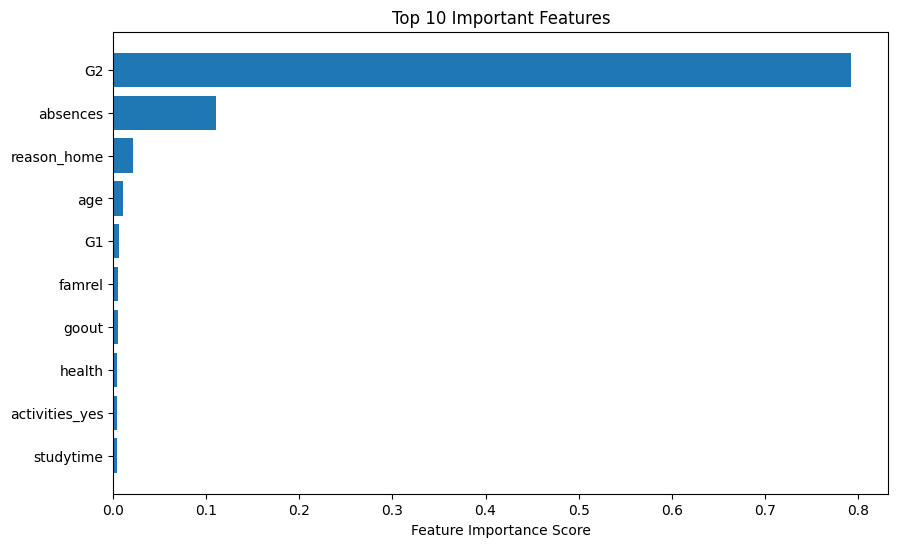

In [ ]:
import numpy as np
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(10,6))
plt.title("Top 10 Important Features")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Feature Importance Score")
plt.show()

In [ ]:
print("Model Comparison:")
print(f"Linear Regression - MAE: {lr_mae:.2f}, R²: {lr_r2:.2f}")
print(f"Random Forest      - MAE: {rf_mae:.2f}, R²: {rf_r2:.2f}")

Model Comparison:
Linear Regression - MAE: 1.65, R²: 0.72
Random Forest      - MAE: 1.16, R²: 0.81


In [ ]:
import joblib
joblib.dump(rf_model, "student_model.pkl")

['student_model.pkl']

In [ ]:
from google.colab import files
files.download("student_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

# Load dataset
df = pd.read_csv("student-mat.csv", sep=";")

# Convert categorical column to binary
df['schoolsup_yes'] = df['schoolsup'].apply(lambda x: 1 if x == 'yes' else 0)

# Use only the 6 features you want in the web app
features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'schoolsup_yes']
X = df[features]
y = df['G3']

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the retrained model
joblib.dump(model, "student_model.pkl")


['student_model.pkl']

In [16]:
from google.colab import files
files.download("student_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>